# 📉 1~2変数関数の勾配降下法の学習

Cf. [Pythonで1変数と2変数関数の勾配降下法を実装してみた - watlab](https://watlab-blog.com/2020/02/29/gradient-descent/)


---
## 勾配降下法とは？
勾配降下法(GD:Gradient Descent)とは、勾配情報から任意関数の最小値を求める問題に使われる手法
> ```e.g.```
> + モデルの学習中に教師データとの誤差を最小にしたい時
> + ものづくりのシミュレーションで強度やコストといった複数のパラメータを設計する際

勾配降下法は分野によっては最急降下法(Steepest descent)と呼ばれ、その名の通り最も急な坂道を降りるアルゴリズム

---
## 勾配降下法の基礎式

**●1変数の場合 :**

$
x_{i+1} = x_i - ηf'(x_i)
$

+ $x_i$ :現在の値
+ $x_{i+1}$ :次の値
+ η (イータ): 学習率（ゲインとも呼ぶ）　・・・ハイパーパラメータ

**●2変数関数の場合 :**

$
（x_{i+1}, y_{i+1}） = (x_i, y_i) - η(\frac{∂f(x,y)}{∂x_i},\frac{∂f(x,y)}{∂y_i})
$

+ ∂ (デル)：微分
+ $\frac{∂f(x,y)}{∂x_i},\frac{∂f(x,y)}{∂y_i}$ :偏微分


**●多変数関数の場合(一般化):**

$
x = (x,y,z,...)\\
∇f = (\frac{∂f}{∂x},\frac{∂f}{∂y},\frac{∂f}{∂z}...)\\
x_{i+1} = x_i - η∇f
$

+ ∇ (ナブラ):勾配　・・・ハミルトン演算子 

---
## 1変数関数の勾配降下法コード

$$
y = x^2 ・・・ 基準関数\\
\\
\frac{∂y}{∂x} = 2x ・・・ 導関数 
$$

```Cf.```
+ [matplotlibの描画の基本 - openbook](https://openbook4.me/sections/1829)
+ [プロットの右側にあるPython Matplotlib Y軸の目盛り](https://qastack.jp/programming/10354397/python-matplotlib-y-axis-ticks-on-right-side-of-plot)
+ [matplotlib.axis.YAxis.set_ticks_position - matplotlib 3.1.1](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axis.YAxis.set_ticks_position.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# グラフプロット用基準関数
def f(x):
    y = x**2
    return y

# 基準関数の導関数
def df(x):
    dy = 2 * x
    return dy

In [3]:
# 勾配降下法に必要なパラメーター
eta = 0.1                   # 学習率
max_itaration = 1000        # 最大反復回数
x0 = 10                     # 初期値
x_pred = [x0]               # 描画用軌跡（初期値プリセット）

# 最大反復枚数まで計算
for i in range(max_itaration):
    x0 = x0 - eta * df(x0)  # 勾配降下法
    x_pred.append(x0)       # 軌跡をリストに追加
    #print(i, ':', x0)

x_pred = np.array(x_pred)   # 描画用にNumPy配列に変換
print(x_pred.shape, type(x_pred))
    
# 基準関数の表示
x = np.arange(-10, 11, 1)
y = f(x)

print(x, '\n', y)

(1001,) <class 'numpy.ndarray'>
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10] 
 [100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81 100]


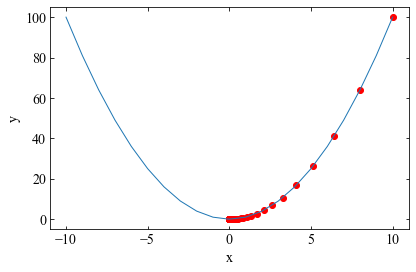

In [4]:
# -------------------(描画)-------------------
# フォントサイズ、フォント種類
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛位置変更（内側）
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 上下左右に目盛線添付
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

# 軸のラベル設定
ax.set_xlabel('x')
ax.set_ylabel('y')

# データプロットの準備
ax.plot(x, y, lw=1)
ax.scatter(x_pred, f(x_pred), color='red')

# 描画
fig.tight_layout()
plt.show()
plt.close()

# -------------------(描画)-------------------

---
## 2変数関数の勾配降下法①

$$
z = x^2 + y^2 ・・・ 基準関数\\ 
\\
\frac{∂z}{∂x} = 2x, \frac{∂z}{∂y} = 2y ・・・ 導関数
$$

```Cf.```
+ [numpy.meshgrid - numpy 1.19](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
+ [[NumPy] 格子点の作成](https://python.atelierkobato.com/meshgrid/)
+ [大域的最適解と局所的最適解](https://jp.mathworks.com/help/optim/ug/local-vs-global-optima.html)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
# 基準関数
def f(x, y):
    z = x**2 + y**2
    return z

# 導関数（基準関数の微分）
def df(x, y):
    dzdx = 2 * x
    dzdy = 2 * y
    dz = np.array([dzdx, dzdy])
    return dz

In [7]:
# 勾配降下法に必要なパラメータ
eta = 0.1                           # 学習率
max_iteration = 1000                # 最大反復回数
x0 = -10                            # 初期値x0
y0 = 10                             # 初期値y0

def get_predicts(eta, max_itaration, x0, y0):
    x_pred = [x0]                   # 描画用x0軌跡リスト(初期値をプリセット)
    y_pred = [y0]                   # 描画用y0軌跡リスト(初期値をプリセット)

    for i in range(max_itaration):
        x0, y0 = np.array([x0, y0]) - eta * df(x0, y0)
        x_pred.append(x0)
        y_pred.append(y0)
        #print(i, ':', x_pred, y_pred)

    x_pred = np.array(x_pred)
    y_pred = np.array(y_pred)
    z_pred = f(x_pred, y_pred)
    return x_pred, y_pred, z_pred

# 実行
x_pred, y_pred, z_pred = get_predicts(eta, max_itaration, x0, y0)

In [8]:
# 基準関数（表示用）
x = np.arange(-10, 11, 1)
y = np.arange(-10, 11, 1)
X, Y = np.meshgrid(x, y) #格子点 (21,21)
Z = f(X, Y) #(21,21)

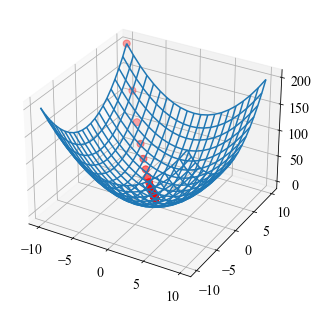

In [9]:
# ------------(描画)------------
# フォントの種類、サイズ設定
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意
fig = plt.figure()
ax = Axes3D(fig)

# 軸のラベル設定
ax.set_xlabel = 'x'
ax.set_ylabel = 'y'
ax.set_zlabel = 'z'

# データプロット
ax.plot_wireframe(X, Y, Z, label='f(x, y)' )
ax.scatter3D(x_pred, y_pred, z_pred, label='gd', color='red', s=50)

# 描画
plt.show()
plt.close()

# ------------(描画)------------

---
## 変数関数の勾配降下法②

$$
z = sin x + cos y ・・・ 基準関数\\
\\
\frac{∂z}{∂x} = cos x,　\frac{∂z}{∂y} = sin y ・・・ 導関数 
$$

In [10]:
# 基準関数
def f(x, y):
    z = np.sin(x) + np.cos(y)
    return z

# 導関数
def df(x, y):
    dzdx = np.cos(x)
    dzdy = np.sin(y)
    dz = np.array([dzdx, dzdy])
    return dz

In [11]:
# 勾配降下法に必要なパラメータ
eta = 0.4                           # 学習率
max_iteration = 1000                # 最大反復回数
x0 = 2                              # 初期値x0
y0 = -0.1                           # 初期値y0

# 実行
x_pred, y_pred, z_pred = get_predicts(eta, max_itaration, x0, y0)

In [12]:
# 基準関数の表示用
x = np.arange(0, 6, 0.2)
y = np.arange(-5, 1, 0.2)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

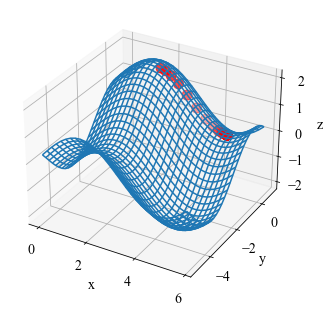

In [13]:
# ここからグラフ描画----------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
 
#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)
 
# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
 
# データプロットする。
ax1.plot_wireframe(X, Y, Z, label='f(x, y)')
ax1.scatter3D(x_pred, y_pred, z_pred, label='gd', color='red', s=100)
 
# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------

    式(10)の関数であれば谷の最小値は全て同じ値。
    最小値の深さが異なると勾配降下法で得られた解が`局所最適解`なのか`大域的最適解`なのかは不明。
    
    以下の図のように、勾配が0になる点は複数あるの。
    この辺が最適化問題の難しい所（ある側面から見ると最小値でも、別の側面から見ると最大値をとる鞍点という点もある）。

<img src='https://watlab-blog.com/wp-content/uploads/2020/02/solution-exp.png' width=35%>
